### Computer Graphics: Point in Polygon: inside-outside test for polygons with even-odd rule
###### by Hamed Shah-hosseini
Explanation at: https://www.pinterest.com/HamedShahHosseini/
<br>https://github.com/ostad-ai/Computer-Graphics

In [5]:
from matplotlib import pyplot as plt
import numpy as np
from math import sin,cos,pi

In [13]:
# generate vertices of a regular polygon
def polygon_regular(n_gon=3,radius=100.):
    vertices=[]
    d_angle=2.*pi/n_gon
    angle=0.
    for i in range(n_gon):
        x,y=radius*cos(angle),radius*sin(angle)
        vertices.append([x,y])
        angle+=d_angle
    return vertices

In [73]:
# vertices contains the vertices of polygon
# each vertex is a row of two columns
# function returns points inside
def polygon_points(vertices):
    vs=np.asarray(vertices)
    Nov=vs.shape[0]# no. of vertices
    points=[]
    xmin,xmax=int(vs[:,0].min()),int(vs[:,0].max())
    ymin,ymax=int(vs[:,1].min()),int(vs[:,1].max())
    for x in range(xmin,xmax+1):
        for y in range(ymin,ymax+1):
            if [x,y] in vertices:
                points.append([x,y]); continue
            p1=0; insideFlag=False            
            for i in range(1,Nov+1):                
                p2=i%Nov
                if (y>min(vs[p1,1],vs[p2,1])) and\
                (y<=max(vs[p1,1],vs[p2,1])) and\
                (x<=max(vs[p1,0],vs[p2,0])):
                    x_intersection=(y-vs[p1,1])*\
                    (vs[p2,0]-vs[p1,0])/(vs[p2,1]-vs[p1,1])+\
                    vs[p1,0]
                    if x<=x_intersection:
                        insideFlag=not insideFlag
                p1=p2
            if insideFlag:
                points.append([x,y])
    return np.asarray(points)

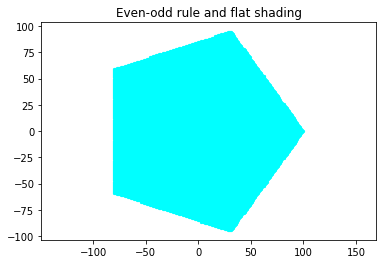

In [74]:
#polygon filling with flat shading
vertices=polygon_regular(5)
CYAN=(0,255,255); col=np.asarray(CYAN)/255
ps=polygon_points(vertices)
plt.scatter(ps[:,0],ps[:,1],color=col,s=5)
plt.title('Even-odd rule and flat shading')
plt.axis('equal'); plt.show()

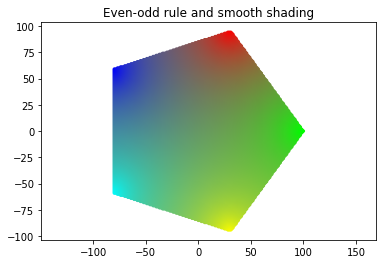

In [75]:
# polygon filling with smooth shading
RED=(255,0,0); GREEN=(0,255,0); BLUE=(0,0,255)
CYAN=(0,255,255); YELLOW=(255,255,0)
colors=np.array([GREEN,RED,BLUE,CYAN,YELLOW])
vertices=polygon_regular(5) #vertices of polygon
ps=polygon_points(vertices) # points inside polygon
cs=[]
# using Inverse Distance Weighting (IDW)
for i in range(ps.shape[0]):
    dists=np.sqrt(np.sum((ps[i]-vertices)**2,axis=1))
    inv_dists=1./(.0001+dists)
    inv_dists/=np.sum(inv_dists)
    temp=np.dot(inv_dists,colors).astype('int')
    cs.append(temp)
cs=np.asarray(cs)/255
plt.scatter(ps[:,0],ps[:,1],c=cs,s=5)
plt.title('Even-odd rule and smooth shading')
plt.axis('equal'); plt.show()